In [9]:
import numpy as np

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Tratamentos aplicados

* T1 = 30 kg. ha-1 de N e K2O de 15 em 15 dias + 0,5 L. ha-1 de bioproduto em todas as colheitas; 
* T2 = 30 kg. ha-1 de N e K2O de 15 em 15 dias + 0,5 L. ha-1 de bioproduto em colheitas alternadas;
* T3 = 30 kg. ha-1 de N e K2O de 15 em 15 dias + 1,0 L. ha-1 de bioproduto em todas as colheitas; 
* T4 = 30 kg. ha-1 de N e K2O de 15 em 15 dias + 1,0 L. ha-1 de bioproduto em colheitas alternadas; 
* T5 = 30 kg. ha-1 de N e K2O de 15 em 15 dias + 1,5 L. ha-1 de bioproduto em todas as colheitas; 
* T6 = 30 kg. ha-1 de N e K2O de 15 em 15 dias + 1,5 L.ha-1 de bioproduto em colheitas alternadas; 
* T7 = 30 kg. ha-1 de N e K2O de 15 em 15 dias + 2,0 L.ha-1 de bioproduto em todas as colheitas; 
* T8 = 30 kg. ha-1 de N e K2O de 15 em 15 dias + 2,0 L.ha-1 de bioproduto em colheitas alternadas; 
* T9 = 30 kg. ha-1 de N e K2O de 15 em 15 dias + 2,5 L.ha-1 de bioproduto em todas as colheitas; 
* T10 = 30 kg. ha-1 de N e K2O de 15 em 15 dias + 2,5 L. ha-1 de bioproduto em colheitas alternadas; T
* T11 = Testemunha adicional 1. 30 kg. ha-1 de N e K2O de 15 em 15 dias + 5,0 L. ha-1 de bioproduto aos 30 e 60 dias após transplante; 
* T12 = Testemunha adicional 2.  10 L. ha-1 bioproduto de 15 em 15 dias; PADRÃO= 30 kg. ha-1 de N e K2O de 15 em 15 dias


Bifatorial misto 5x2 com um fator qualitativo e um quantitativo

In [10]:
df = pd.read_excel("Tomate.xlsx")

df.columns = ["estacao", "tratamento", "bloco", "colheita", "peso", "n_frutos", "comprimento", "largura"]

display( df.head(3) )

print("Tipos das variáveis:\n{}".format(df.dtypes))

,estacao,tratamento,bloco,colheita,peso,n_frutos,comprimento,largura
0,P-V,1,1,1,309.0,1.5,62.333333,82.333333
1,P-V,1,2,1,0.0,0.0,0.000000,0.000000
2,P-V,1,3,1,196.0,1.0,63.000000,71.000000


Tipos das variáveis:
estacao         object
tratamento       int64
bloco            int64
colheita         int64
peso           float64
n_frutos       float64
comprimento    float64
largura        float64
dtype: object


In [15]:
df.n_frutos

0      1.5
1      0.0
2      1.0
3      0.5
4      1.5
      ... 
535    3.0
536    5.0
537    5.0
538    5.0
539    4.5
Name: n_frutos, Length: 540, dtype: float64

<AxesSubplot:xlabel='estacao', ylabel='n_frutos'>

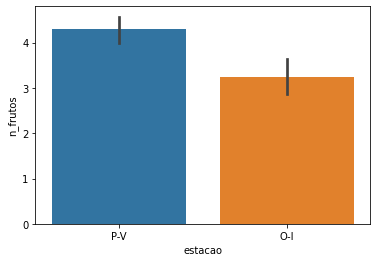

In [14]:
sns.barplot(x = df.estacao, y = df.n_frutos)

In [3]:
df.query("estacao == 'P-V'")

,estacao,tratamento,bloco,colheita,peso,n_frutos,comprimento,largura
0,P-V,1,1,1,309.0,1.5,62.333333,82.333333
1,P-V,1,2,1,0.0,0.0,0.000000,0.000000
2,P-V,1,3,1,196.0,1.0,63.000000,71.000000
3,P-V,2,1,1,15.5,0.5,33.000000,43.000000
4,P-V,2,2,1,152.0,1.5,39.333333,56.000000
...,...,...,...,...,...,...,...,...
355,P-V,11,2,10,959.5,5.0,61.900000,77.700000
356,P-V,11,3,10,990.5,5.5,62.090909,74.454545
357,P-V,12,1,10,709.5,6.0,55.000000,66.090909
358,P-V,12,2,10,2075.0,11.5,63.625000,73.750000


In [7]:
df.n_frutos.unique()

array([ 1.5,  0. ,  1. ,  0.5,  4.5,  2.5,  2. ,  6.5,  8. ,  3. ,  5. ,
        4. ,  6. ,  8.5,  5.5,  7.5,  7. ,  3.5,  9. , 10. , 11.5, 11. ,
       12. ,  9.5, 15. , 12.5, 10.5])

## Estudo exploratório doses de fertilizante

In [4]:
# Todas as colheitas
g1 = [1,3,5,7,9]

# Colheitas alternadas
g2 = [2,4,6,8,10]

# Dados relacionados a todas as colheitas
df1 = df.query("tratamento in {}".format(g1))

# Dados relacionados a colheitas alternadas
df2 = df.query("tratamento in {}".format(g2))

## Delineamento em blocos casualizado (DBC)

Considerando que uma possível variável de interesse $Y$ não tenha variação temporal, definimos o modelo de delineamento de blocos casualizado da seguinte forma
\begin{equation*}
    Y_{ij} = \mu + \tau_i + \beta_j + \varepsilon_{ij}
\end{equation*}
Em que $\tau_i$ representa o efeito do $i$-ésimo tratamento, $\beta_j$ o efeito do $j$-ésimo bloco e $\varepsilon_{ij}$ o erro aleatório associado a essa variável.

No caso deste trabalho, a princípio temos 4 variáveis candidatas à variável de interesse: Peso das parcelas, Número médio de frutos, comprimento médio da parcela ou largura média da parcela. Usando este raciocínio nos resta apenas as variáveis relacionadas à estação do ano e o número da colheita ao longo do tempo. O efeito da estação do ano pode ser facilmente contabilizado a partir da introdução de uma variável binária no modelo, resultando em
\begin{equation*}
    Y_{ij} = \mu + \tau_i + \beta_j + \theta \cdot \mathcal I_{PV} + \varepsilon_{ij}
\end{equation*}
em que $\mathcal I_{PV}$ é a função indicadora de que a estação do ano é primavera-verão. Neste caso a variável da média geral $\mu$ irá contabilizar por sua vez a média da variável de interesse considerando-se que a observação foi coletada no inverno-outono, de modo que $\theta$ retém toda a informação sobre a mudança de estações.

Finalmente, nos resta apenas levar em conta o fato das colheitas serem dispostas ao longo do tempo. Naturalmente espera-se que a medida que o tempo passa, as colheitas sejam cada vez mais numerosas, dado que em cada leva (de 3 em 3 dias) os tomates verdes são ignorados. Para isso, é necessário identificarmos como será a estrutura da função dependente de $t$ com relação a cada tratamento e bloco.

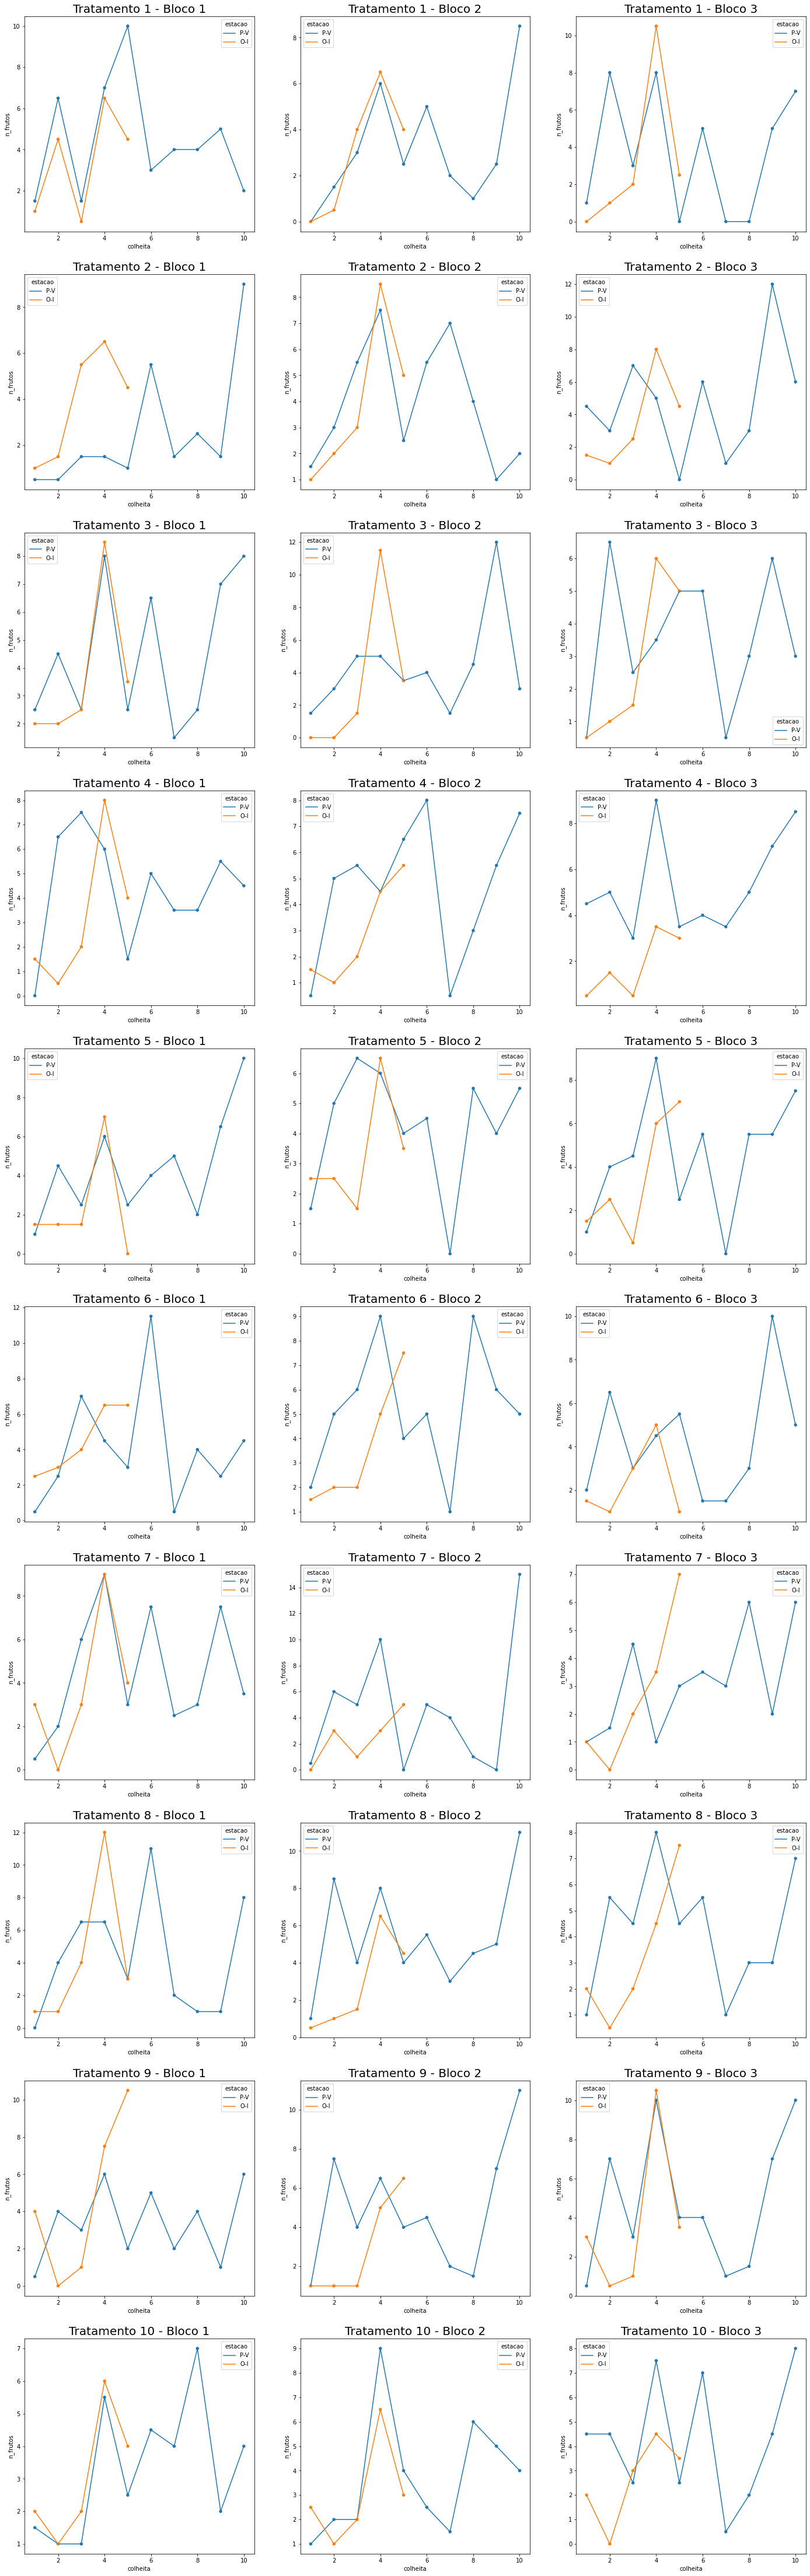

In [5]:
fig, ax = plt.subplots(nrows = 10, ncols = 3, figsize = (24,80))

for i in range(1,11):
    for j in range(1,4):
        df_aux = df.query("tratamento == {} & bloco == {}".format(i,j))
        sns.lineplot(data = df_aux, x = "colheita", y = "n_frutos",
                     hue = "estacao", ax = ax[i-1,j-1])
        sns.scatterplot(data = df_aux, x = "colheita", y = "n_frutos",
                        hue = "estacao", ax = ax[i-1,j-1], legend = False)
        ax[i-1,j-1].set_title("Tratamento {} - Bloco {}".format(i,j), fontsize = 20)

## Estudo da variável resposta

Como mencionado acima, temos 4 candidatas a variáveis de interesse para o problema. Seria possível obtermos uma sumarização destas informações em um único índice de qualidade da plantação?

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
df.head(3)

,estacao,tratamento,bloco,colheita,peso,n_frutos,comprimento,largura
0,P-V,1,1,1,309.0,1.5,62.333333,82.333333
1,P-V,1,2,1,0.0,0.0,0.000000,0.000000
2,P-V,1,3,1,196.0,1.0,63.000000,71.000000


In [9]:
sc = StandardScaler()
 
X = df.filter(["peso", "n_frutos", "comprimento", "largura"])
X = sc.fit_transform(X)

pca = PCA(n_components = 4)
pca.fit(X)

X_pca = pca.transform(X)

pca.explained_variance_ratio_

array([0.65130432, 0.31450235, 0.02303823, 0.0111551 ])

In [12]:
pca.components_

array([[-0.51753106, -0.45879767, -0.52159402, -0.49960582],
       [ 0.44955946,  0.57115373, -0.45975706, -0.51019912],
       [-0.71534131,  0.65765608,  0.21809017, -0.09061996],
       [-0.13544264,  0.17543259, -0.6848356 ,  0.69417498]])

In [27]:
df = df.assign(pca = X_pca[:,0])

In [28]:
df

,estacao,tratamento,bloco,colheita,peso,n_frutos,comprimento,largura,pca
0,P-V,1,1,1,309.0,1.5,62.333333,82.333333,0.648593
1,P-V,1,2,1,0.0,0.0,0.000000,0.000000,5.201482
2,P-V,1,3,1,196.0,1.0,63.000000,71.000000,1.072075
3,P-V,2,1,1,15.5,0.5,33.000000,43.000000,2.964030
4,P-V,2,2,1,152.0,1.5,39.333333,56.000000,2.170365
...,...,...,...,...,...,...,...,...,...
535,O-I,11,2,5,920.0,3.0,69.666667,87.333333,-0.415876
536,O-I,11,3,5,1345.0,5.0,69.100000,79.700000,-0.852414
537,O-I,12,1,5,1552.0,5.0,69.900000,92.000000,-1.336272
538,O-I,12,2,5,1340.0,5.0,70.100000,81.900000,-0.935786


In [30]:
df.to_csv("df.csv")

Vemos, por exemplo que os coeficientes da primeira componente principal são todos negativos. Dessa forma, a primeira componente parece medir o de certa forma um cenário oposto ao desejado. No cenário desejado é esperado que os tomates tenham grande peso, com vários frutos, grande comprimento e largura. Se tratando de todos os valores negativos, a primeira componente parece medir o quão inferior é o tratamento. Deste modo selecionaríamos o melhor tratamento ao maximizar a variável resposta, por exemplo.

In [19]:
df.head(3)

,estacao,tratamento,bloco,colheita,peso,n_frutos,comprimento,largura
0,P-V,1,1,1,309.0,1.5,62.333333,82.333333
1,P-V,1,2,1,0.0,0.0,0.000000,0.000000
2,P-V,1,3,1,196.0,1.0,63.000000,71.000000


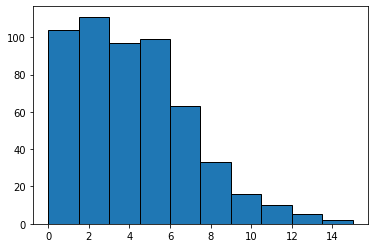

In [25]:
plt.hist(df.n_frutos, edgecolor = "black")
plt.show()

In [15]:
np.mean(df.n_frutos == 0)

0.046296296296296294

## Modelagem final

\begin{equation*}
    Y_{ij} = \mu + T_i + B_j + E_k + C_\ell + \varepsilon_{ij}, i = 1, \dots, 10; j = 1, 2, 3; k = 1,2; \ell = 1,\dots,10
\end{equation*}

In [10]:
df.query("tratamento == 1 & colheita == 6")

,estacao,tratamento,bloco,colheita,peso,n_frutos,comprimento,largura
180,P-V,1,1,6,785.0,3.0,70.666667,85.0
181,P-V,1,2,6,1436.5,5.0,70.400000,84.3
182,P-V,1,3,6,1452.0,5.0,72.200000,86.6
